# Part 2 - Exploratory Data Analysis (EDA)

In [1]:
# Load packages

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Load dataset

df = pd.read_csv('Part_1.csv')

pd.set_option("display.max_columns", None)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.0,36.0,10.65,162.87,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,1985-01-01,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0
1,2500.0,60.0,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,1999-04-01,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0
2,2400.0,36.0,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2001-11-01,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0
3,10000.0,36.0,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,1996-02-01,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0
4,3000.0,60.0,12.69,67.79,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Fully Paid,other,OR,17.94,0.0,1996-01-01,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0


In [3]:
df.shape

(39786, 25)

## Functions needed for further actions

In [4]:
# Function for plotting two categorical features (feature and target)

def categorical_features(df, name):
    # Creating a two-column subplot
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # First subplot
    sns.countplot(data=df, x=name, ax=axs[0])
    axs[0].set_title(f"Distribution of {name}")

    # Second subplot
    sns.countplot(data=df, x=name, hue="loan_status", ax=axs[1])
    axs[1].set_title(f"Distribution of {name} in loan_status")

    # Removing empty subplots
    plt.close(2)

    # Displaying charts
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show()

In [5]:
# Function for plotting one numeric feature and one categorical feature (feature and target)

def numeric_features(df, name):
    # Creating a two-column subplot
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # First subplot
    sns.boxplot(data=df, x=name, ax=axs[0])
    axs[0].set_title(f'Boxplot: {name}')

    # Second subplot
    sns.boxplot(data=df, x="loan_status", y=name, ax=axs[1])
    axs[1].set_title(f'Boxplot: {name} relative to loan_status')

    # Displaying charts
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show()

In [6]:
# Function for calculating the value difference between .max and .min - 'range'

def range_v(df, name):
    x = df[name].max() - df[name].min()
    return x

In [7]:
# Function for calculating Quartiles - 'quartiles'

def quartiles(df, name):
    Q1 = df[name].quantile(q = 0.25)
    Q3 = df[name].quantile(q = 0.75)
    return Q1, Q3, stats.iqr(df[name])

In [8]:
# Function for outlier detection from Interquartile range (IQR) in original data - 'l_u'

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR

def l_u(df, name):
    Q1 = df[name].quantile(q = 0.25)
    Q3 = df[name].quantile(q = 0.75)
    L_outliers = Q1 - 1.5 * (Q3 - Q1)
    U_outliers = Q3 + 1.5 * (Q3 - Q1)
    return L_outliers, U_outliers

In [9]:
# Function for calculating number and percetage of outliers - 'outliers'

def outliers(df, name):
    Q1 = df[name].quantile(q = 0.25)
    Q3 = df[name].quantile(q = 0.75)
    (L_outliers, U_outliers) = l_u(df, name)
    a = df[df[name] > U_outliers][name].count()
    b = df[df[name] < L_outliers][name].count()
    c = round(df[df[name] > U_outliers][name].count() * 100 / len(df))
    d = round(df[df[name] < L_outliers][name].count() * 100 / len(df))
    return a, b, c, d

## 1. 'loan_status' - Current status of the loan.

In [10]:
df["loan_status"] = df["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else 0)

In [11]:
# Putting the target column (loan status) in the first place

df.insert(0, 'loan_status', df.pop('loan_status'))

In [12]:
df.loan_status.head(10)

0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: loan_status, dtype: int64

<Figure size 800x400 with 0 Axes>

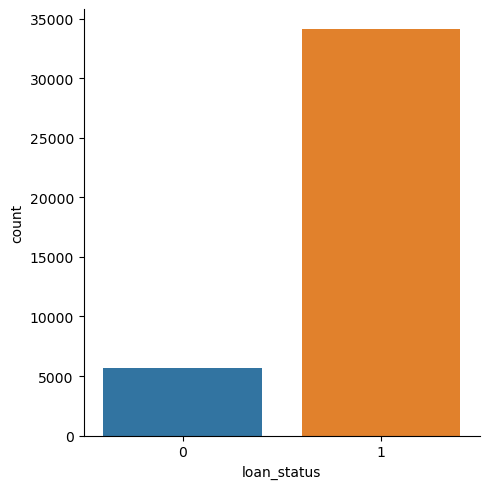

In [13]:
plt.figure(figsize=(8,4))
sns.catplot(data=df, x="loan_status", kind="count")
plt.show()

In [14]:
df.loan_status.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

## 2. 'loan_amnt' - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [15]:
df['loan_amnt'].describe()

count    39786.000000
mean     11231.360277
std       7464.542832
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Loan amounts range between 500 dollars and 35000 dollars with a median $11231.36. There is a large spread of borrowed amounts. The standard deviation exceeds the amounts included in the first quartile and represents about 75% of the amounts borrowed.

In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,12147.491182,8108.982549,900.0,5612.5,10000.0,16750.0,35000.0
1,34116.0,11079.101448,7341.022332,500.0,5500.0,9837.5,15000.0,35000.0


The loan statistics of Fully Paid (1) and Charged Off (0) are similar. Only the minimum loan amount of Charged Off is significantly higher.

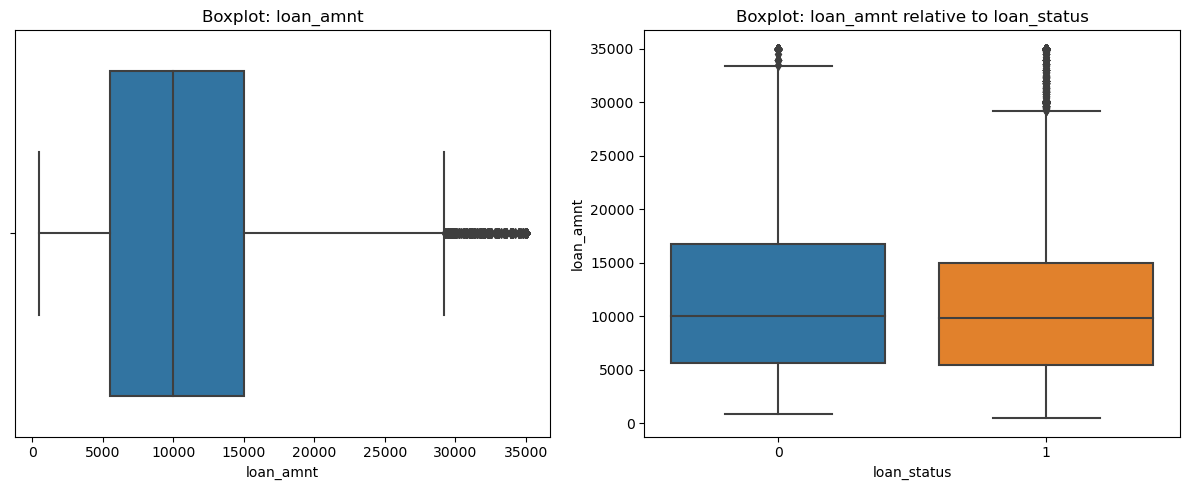

In [17]:
numeric_features(df, "loan_amnt")

In [18]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'loan_amnt'))
print('L_outliers, U_outliers: ', l_u(df, 'loan_amnt'))
print('Q1, Q3, IQR: ', quartiles(df, 'loan_amnt'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'loan_amnt'))

Range of values:  34500.0
L_outliers, U_outliers:  (-8750.0, 29250.0)
Q1, Q3, IQR:  (5500.0, 15000.0, 9500.0)
No.U_outliers, No.L_outliers, %U, %L:  (1239, 0, 3, 0)


Most loans were in the range of 5500 dollars and 15000 dollars. The highest loan amounts (above average + standard deviation,> $ 29250) are 3% of loans granted.

## 3. 'term' - The number of payments on the loan. Values are in months and can be either 36 or 60.

In [19]:
df['term'].describe()

count    39786.000000
mean        42.448499
std         10.638782
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [20]:
df['term'].value_counts(normalize=True).round(4) * 100

36.0    73.13
60.0    26.87
Name: term, dtype: float64

Shorter loans (36 months) are more popular. About 73% of loans have 36 months period.

In [21]:
df.groupby('loan_status')['term'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,46.340741,11.885780,36.0,36.0,36.0,60.0,60.0
1,34116.0,41.801618,10.275366,36.0,36.0,36.0,36.0,60.0


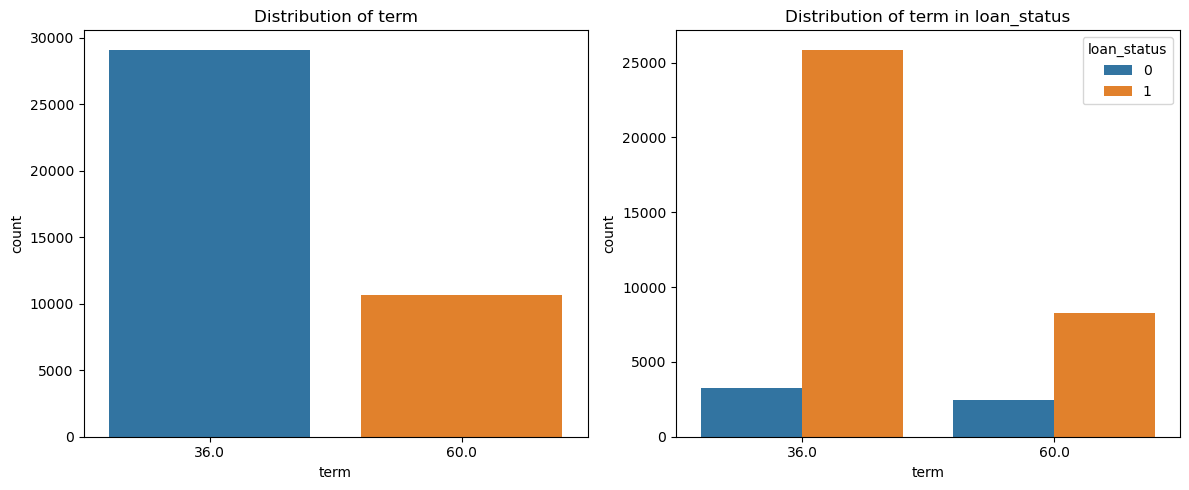

In [22]:
categorical_features(df, "term")

More of the shorter loans (36 months) have been paid off (Fully Paid).

In [23]:
# Converting 'term' to an integer.

df['term'] = df['term'].astype(int, errors = 'raise')

## 4. 'int_rate' - Interest Rate on the loan

In [24]:
df['int_rate'].describe()

count    39786.000000
mean        12.027873
std          3.727466
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [25]:
df['int_rate'].value_counts(normalize=True)

10.99    0.024079
13.49    0.020887
11.49    0.020761
7.51     0.019781
7.88     0.018222
           ...   
18.36    0.000025
16.96    0.000025
16.15    0.000025
16.01    0.000025
17.44    0.000025
Name: int_rate, Length: 371, dtype: float64

In [26]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,13.837469,3.655730,5.42,11.36,13.61,16.40,24.40
1,34116.0,11.727123,3.653453,5.42,8.88,11.49,14.17,24.59


In [27]:
df.groupby('term')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36,29096.0,11.004656,3.233546,5.42,7.90,10.99,13.47,23.22
60,10690.0,14.812862,3.556277,5.79,11.99,14.83,17.49,24.59


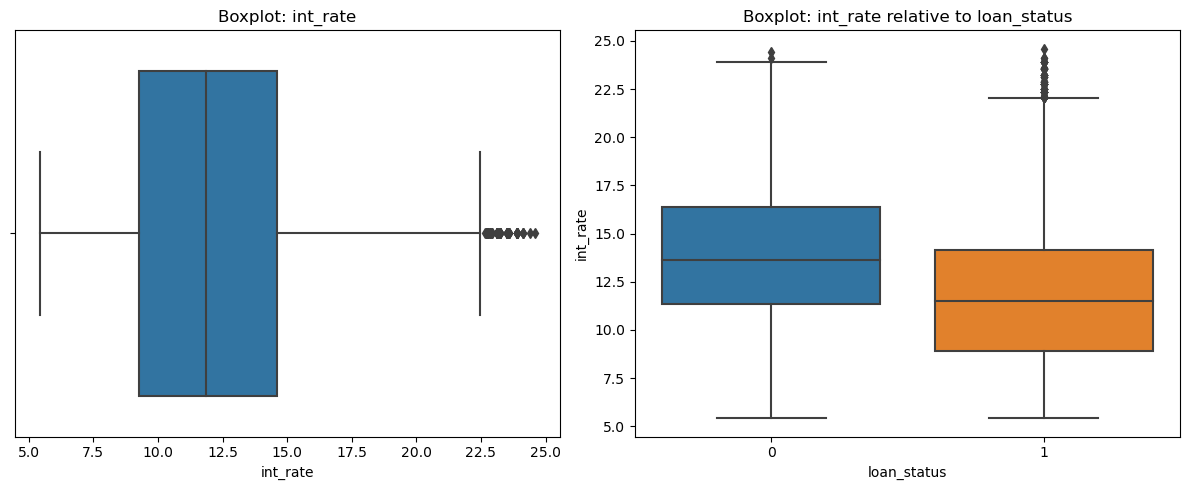

In [28]:
numeric_features(df, "int_rate")

In [29]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'int_rate'))
print('L_outliers, U_outliers: ', l_u(df, 'int_rate'))
print('Q1, Q3, IQR: ', quartiles(df, 'int_rate'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'int_rate'))

Range of values:  19.17
L_outliers, U_outliers:  (1.2400000000000002, 22.6)
Q1, Q3, IQR:  (9.25, 14.59, 5.34)
No.U_outliers, No.L_outliers, %U, %L:  (78, 0, 0, 0)


Probably, the interest rate on the loan depends on many factors that will be examined during this analysis. The first thing that is immediately noticeable is lower interest rates on longer loans (60 months). Most loans have an interest rate in the range of 9.25% - 14.59%.

## 5. 'installment' - The monthly payment owed by the borrower if the loan originates.

In [30]:
df['installment'].describe()

count    39786.000000
mean       324.733637
std        208.923212
min         15.690000
25%        167.080000
50%        280.610000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

In [31]:
df['installment'].value_counts(normalize=True)

311.11    0.001709
180.96    0.001483
311.02    0.001357
150.80    0.001206
368.45    0.001156
            ...   
280.83    0.000025
323.06    0.000025
76.30     0.000025
255.03    0.000025
255.43    0.000025
Name: installment, Length: 15405, dtype: float64

In [32]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,336.810628,217.209322,22.79,168.74,294.76,458.8975,1305.19
1,34116.0,322.726470,207.449182,15.69,166.50,278.63,426.1000,1295.21


In [33]:
df.groupby('term')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36,29096.0,311.693307,209.513447,15.69,160.4500,261.88,405.4750,1305.19
60,10690.0,360.226758,203.120577,19.87,205.9725,328.46,483.0675,1005.06


The monthly payment owed by the borrower if the loan originates is higher for longer loans (60 months). Borrowers with higher monthly installments pay their debts less frequently.

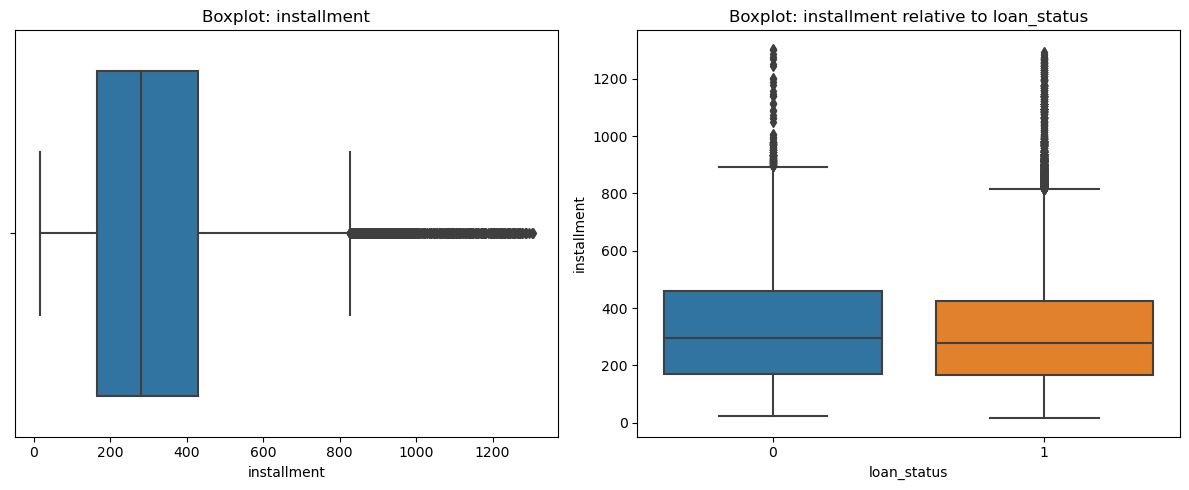

In [34]:
numeric_features(df, "installment")

In [35]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'installment'))
print('L_outliers, U_outliers: ', l_u(df, 'installment'))
print('Q1, Q3, IQR: ', quartiles(df, 'installment'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'installment'))

Range of values:  1289.5
L_outliers, U_outliers:  (-228.46999999999989, 826.3299999999999)
Q1, Q3, IQR:  (167.08, 430.78, 263.69999999999993)
No.U_outliers, No.L_outliers, %U, %L:  (1249, 0, 3, 0)


## 6. 'emp_length' - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [36]:
df['emp_length'].describe()

count    39786.000000
mean         4.983813
std          3.563325
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [37]:
df.groupby('loan_status')['emp_length'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,5.101058,3.600658,0.0,2.0,5.0,9.0,10.0
1,34116.0,4.964328,3.556761,0.0,2.0,4.0,9.0,10.0


In [38]:
df[df.loan_status == 0].groupby('emp_length').count().loan_status

emp_length
0.0      662
1.0      475
2.0      591
3.0      588
4.0      494
5.0      474
6.0      322
7.0      271
8.0      218
9.0      167
10.0    1408
Name: loan_status, dtype: int64

In [39]:
df[df.loan_status == 1].groupby('emp_length').count().loan_status

emp_length
0.0     4033
1.0     2860
2.0     3893
3.0     3642
4.0     3043
5.0     2902
6.0     1979
7.0     1555
8.0     1310
9.0     1120
10.0    7779
Name: loan_status, dtype: int64

In both groups of 'loan_status' (Fully Paid - 1, Charged Off - 0), borrowers working for more than 10 years and less than a year are the largest groups, with an emphasis on the longest working borrowers.

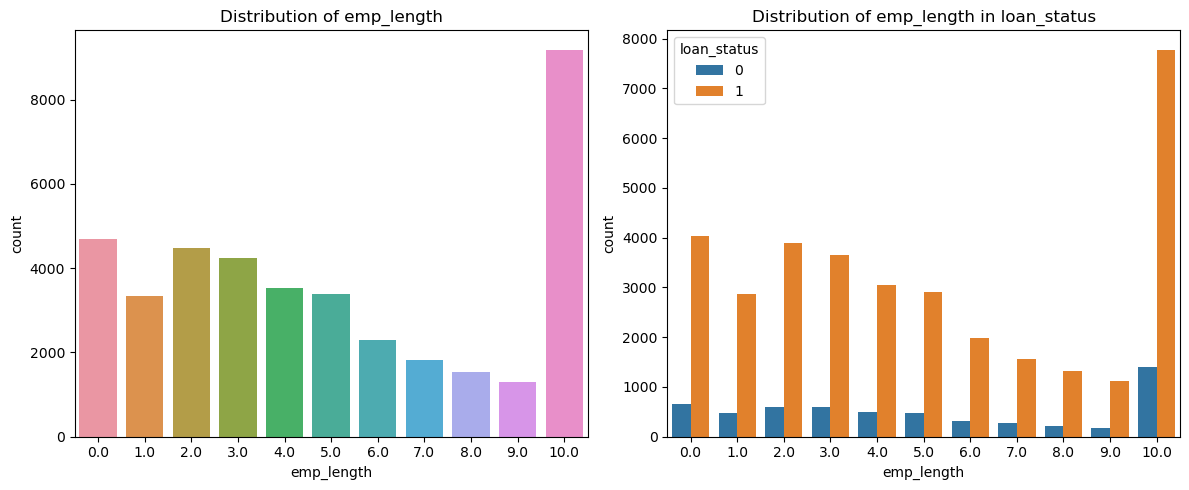

In [40]:
categorical_features(df, "emp_length")

In [41]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'emp_length'))
print('L_outliers, U_outliers: ', l_u(df, 'emp_length'))
print('Q1, Q3, IQR: ', quartiles(df, 'emp_length'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'emp_length'))

Range of values:  10.0
L_outliers, U_outliers:  (-8.5, 19.5)
Q1, Q3, IQR:  (2.0, 9.0, 7.0)
No.U_outliers, No.L_outliers, %U, %L:  (0, 0, 0, 0)


## 7. 'annual_inc' - The self-reported annual income provided by the borrower during registration.

In [42]:
df['annual_inc'].describe()

count    3.978600e+04
mean     6.897907e+04
std      6.376263e+04
min      4.000000e+03
25%      4.050000e+04
50%      5.900000e+04
75%      8.234250e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [43]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,62540.233340,47714.22363,4080.0,37200.00,53000.0,75000.0,1250000.0
1,34116.0,70049.185921,65992.76733,4000.0,41866.75,60000.0,84000.0,6000000.0


The self-reported annual income provided by the borrower during registration is higer for borrowers who have repaid their loans (Fully Paid).

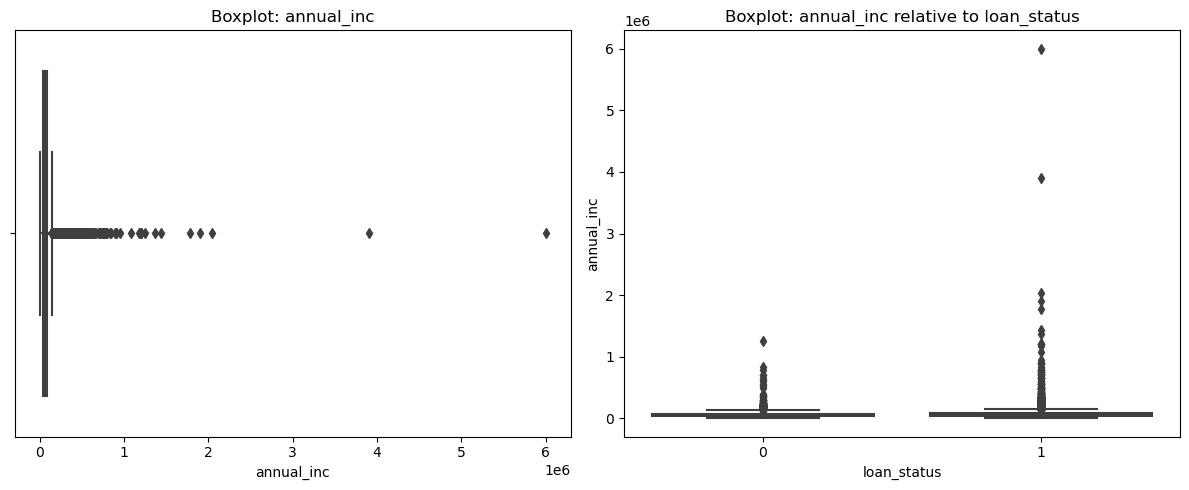

In [44]:
numeric_features(df, "annual_inc")

In [45]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'annual_inc'))
print('L_outliers, U_outliers: ', l_u(df, 'annual_inc'))
print('Q1, Q3, IQR: ', quartiles(df, 'annual_inc'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'annual_inc'))

Range of values:  5996000.0
L_outliers, U_outliers:  (-22263.75, 145106.25)
Q1, Q3, IQR:  (40500.0, 82342.5, 41842.5)
No.U_outliers, No.L_outliers, %U, %L:  (1848, 0, 5, 0)


The self reported annual income provided by the borrower during registration varies greatly. Its influence on other factors will be investigated in this analysis.

## 8. 'dti' - A ratio calculated using the borrowers total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowerâ€™s self-reported monthly income.

In [46]:
df['dti'].describe()

count    39786.000000
mean        13.317794
std          6.678300
min          0.000000
25%          8.180000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [47]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,14.005540,6.580177,0.0,9.0525,14.295,19.29,29.85
1,34116.0,13.203492,6.687713,0.0,8.0400,13.250,18.46,29.99


Indicator similar for both options. Slightly higher for charged off, probably because the monthly income is in the denominator when calculating the index.

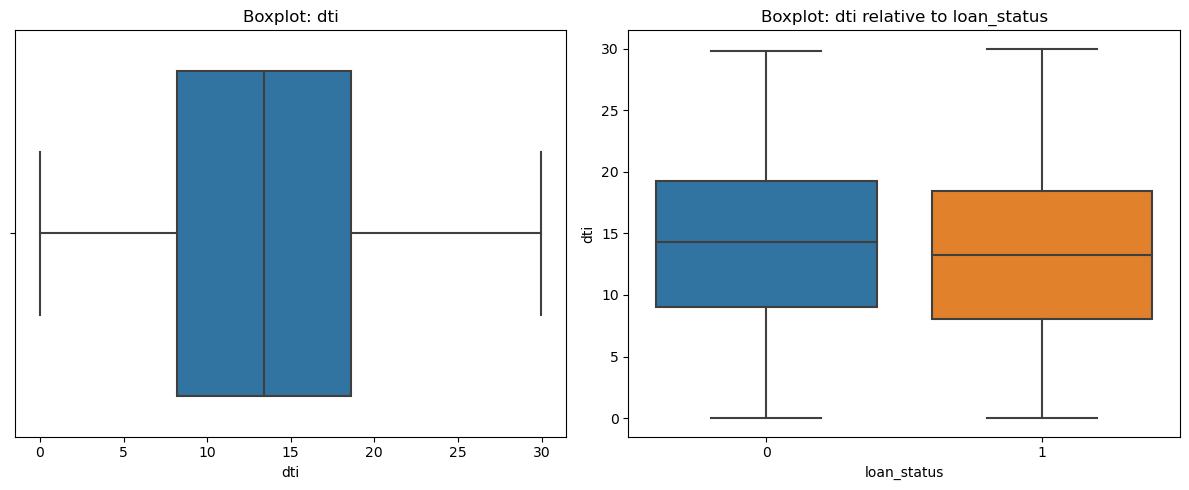

In [48]:
numeric_features(df, "dti")

The value dti has a distribution close to normal.

In [49]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'dti'))
print('L_outliers, U_outliers: ', l_u(df, 'dti'))
print('Q1, Q3, IQR: ', quartiles(df, 'dti'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'dti'))

Range of values:  29.99
L_outliers, U_outliers:  (-7.450000000000003, 34.230000000000004)
Q1, Q3, IQR:  (8.18, 18.6, 10.420000000000002)
No.U_outliers, No.L_outliers, %U, %L:  (0, 0, 0, 0)


## 9. 'delinq_2yrs' - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [50]:
df['delinq_2yrs'].describe()

count    39786.000000
mean         0.146534
std          0.491826
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [51]:
df.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,0.170899,0.535460,0.0,0.0,0.0,0.0,8.0
1,34116.0,0.142484,0.484083,0.0,0.0,0.0,0.0,11.0


In [52]:
df['delinq_2yrs'].value_counts()

0.0     35466
1.0      3309
2.0       688
3.0       221
4.0        62
5.0        22
6.0        10
7.0         4
8.0         2
9.0         1
11.0        1
Name: delinq_2yrs, dtype: int64

In [53]:
# The percentage of borrowers who are not late with their loan repayment by more than 30 days.

((df.delinq_2yrs == 0.0).sum() / df['delinq_2yrs'].count()) * 100

89.14190921429649

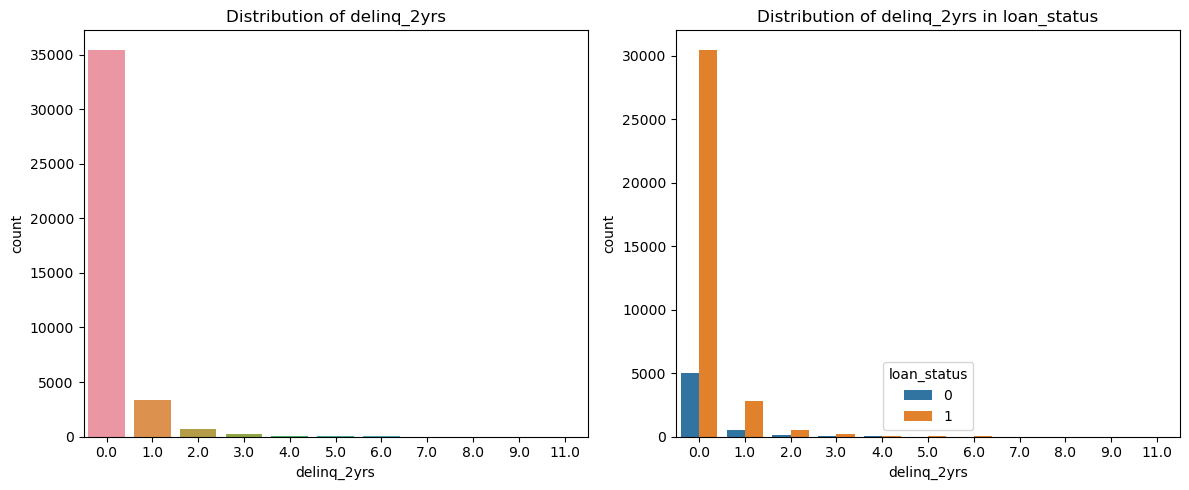

In [54]:
categorical_features(df, "delinq_2yrs")

The vast majority of borrowers (89%) were not late with their obligations by more than 30 days. This result indicates that all other borrowers are exceptions. The plots also show this.

In [55]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'delinq_2yrs'))
print('L_outliers, U_outliers: ', l_u(df, 'delinq_2yrs'))
print('Q1, Q3, IQR: ', quartiles(df, 'delinq_2yrs'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'delinq_2yrs'))

Range of values:  11.0
L_outliers, U_outliers:  (0.0, 0.0)
Q1, Q3, IQR:  (0.0, 0.0, 0.0)
No.U_outliers, No.L_outliers, %U, %L:  (4320, 0, 11, 0)


## 10. 'inq_last_6mths' - The number of inquiries in past 6 months (excluding auto and mortgage inquiries).

In [56]:
df['inq_last_6mths'].describe()

count    39786.000000
mean         0.869049
std          1.070069
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

In [57]:
df.groupby('loan_status')['inq_last_6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,1.056261,1.153201,0.0,0.0,1.0,2.0,8.0
1,34116.0,0.837935,1.052414,0.0,0.0,1.0,1.0,8.0


In [58]:
df['inq_last_6mths'].value_counts()

0.0    19337
1.0    10986
2.0     5824
3.0     3053
4.0      326
5.0      146
6.0       64
7.0       35
8.0       15
Name: inq_last_6mths, dtype: int64

In [59]:
# The percentage of no inquiries out of the number of borrowers

((df.inq_last_6mths == 0.0).sum() / df['inq_last_6mths'].count()) * 100

48.6025235007289

In [60]:
# Percentage of borrowers with 1 inquiry out of the number of borrowers

((df.inq_last_6mths == 1.0).sum() / df['inq_last_6mths'].count()) * 100

27.612728095309908

Not all of 50% of borrowers (48.6%) did not submit additional inquiries. The 27.6% of borrowers submitted 1 question. Both groups constitute the majority.

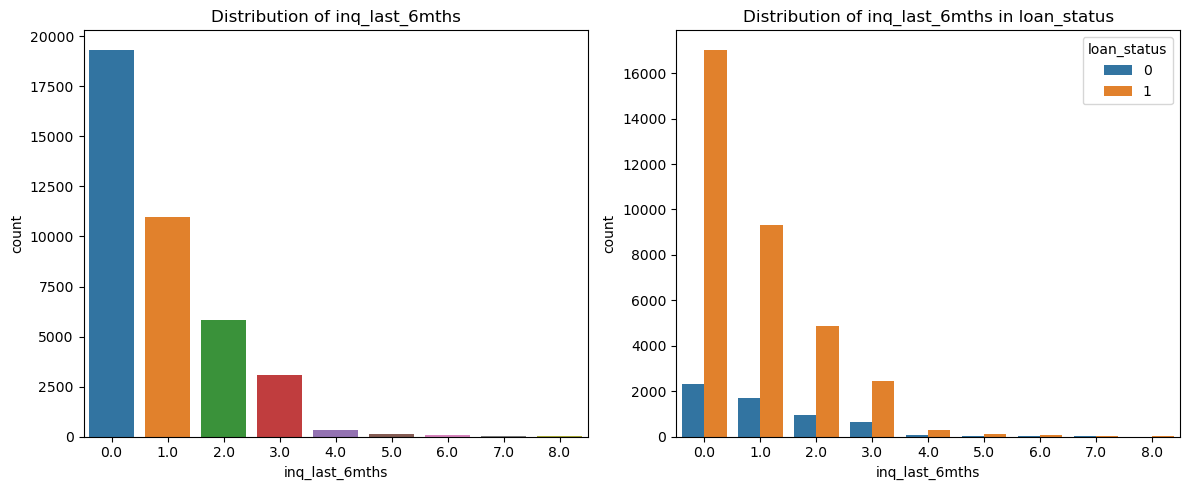

In [61]:
categorical_features(df, "inq_last_6mths")

In [62]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'inq_last_6mths'))
print('L_outliers, U_outliers: ', l_u(df, 'inq_last_6mths'))
print('Q1, Q3, IQR: ', quartiles(df, 'inq_last_6mths'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'inq_last_6mths'))

Range of values:  8.0
L_outliers, U_outliers:  (-1.5, 2.5)
Q1, Q3, IQR:  (0.0, 1.0, 1.0)
No.U_outliers, No.L_outliers, %U, %L:  (3639, 0, 9, 0)


## 11. 'open_acc' - The number of open credit lines in the borrower's credit file.

In [63]:
df['open_acc'].describe()

count    39786.000000
mean         9.294023
std          4.399997
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [64]:
df.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,9.183951,4.530120,2.0,6.0,8.0,12.0,38.0
1,34116.0,9.312317,4.377796,2.0,6.0,9.0,12.0,44.0


In [65]:
df['open_acc'].value_counts()

7.0     4025
6.0     3954
8.0     3944
9.0     3727
10.0    3227
5.0     3185
11.0    2750
4.0     2346
12.0    2279
13.0    1915
3.0     1496
14.0    1489
15.0    1177
16.0     941
17.0     743
2.0      608
18.0     534
19.0     396
20.0     290
21.0     244
22.0     143
23.0      98
24.0      81
25.0      55
26.0      34
28.0      25
27.0      22
30.0      15
29.0      13
31.0       7
34.0       5
32.0       4
35.0       4
33.0       3
36.0       2
39.0       1
38.0       1
44.0       1
41.0       1
42.0       1
Name: open_acc, dtype: int64

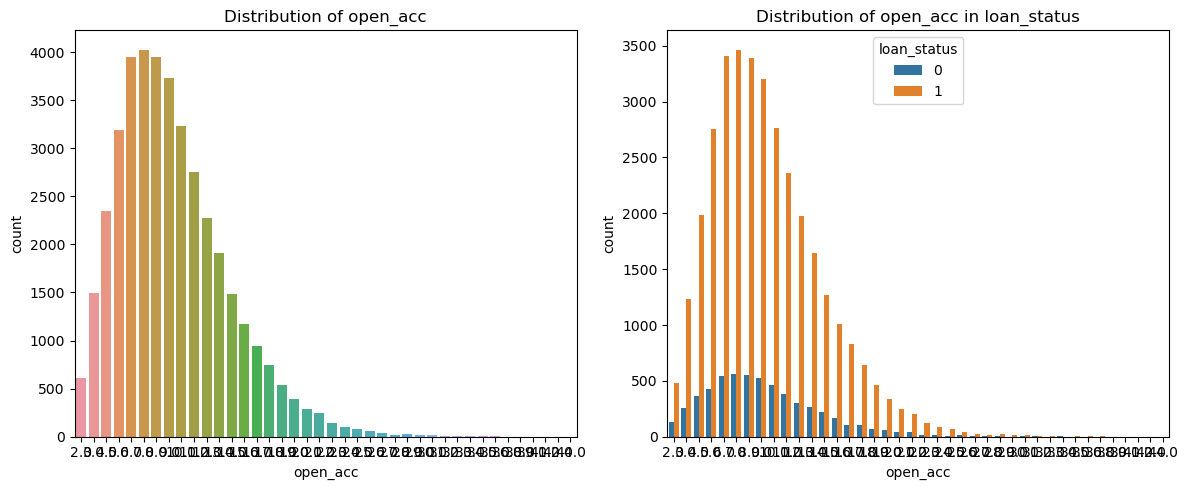

In [66]:
categorical_features(df, "open_acc")

Close to normal distribution. The borrowers have multiple credit lines open. Further analysis should show other dependencies. Fully Paid and Charged Off borrowers have a similar number of open lines of credit.

In [67]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'open_acc'))
print('L_outliers, U_outliers: ', l_u(df, 'open_acc'))
print('Q1, Q3, IQR: ', quartiles(df, 'open_acc'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'open_acc'))

Range of values:  42.0
L_outliers, U_outliers:  (-3.0, 21.0)
Q1, Q3, IQR:  (6.0, 12.0, 6.0)
No.U_outliers, No.L_outliers, %U, %L:  (516, 0, 1, 0)


## 12. 'pub_rec' - Number of derogatory public records.

In [68]:
df['pub_rec'].describe()

count    39786.000000
mean         0.055145
std          0.237653
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [69]:
df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,0.084832,0.284917,0.0,0.0,0.0,0.0,2.0
1,34116.0,0.050211,0.228485,0.0,0.0,0.0,0.0,4.0


In [70]:
df['pub_rec'].value_counts()

0.0    37665
1.0     2060
2.0       51
3.0        8
4.0        2
Name: pub_rec, dtype: int64

In [71]:
((df.pub_rec == 0.0).sum() / df['pub_rec'].count()) * 100

94.66897903785251

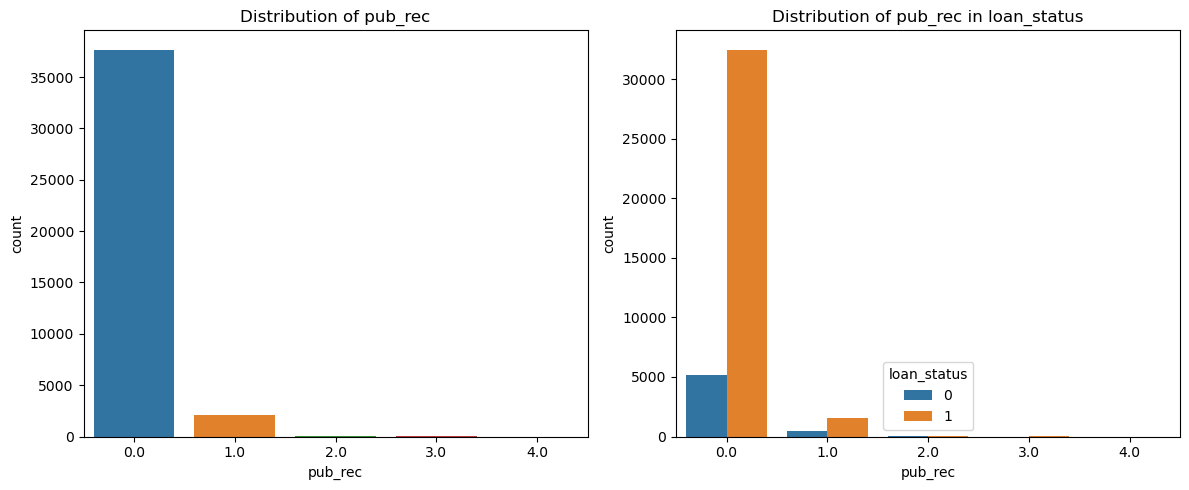

In [72]:
categorical_features(df, "pub_rec")

The vast majority of borrowers (94.6%) do not appear on derogatory public records.

In [73]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'pub_rec'))
print('L_outliers, U_outliers: ', l_u(df, 'pub_rec'))
print('Q1, Q3, IQR: ', quartiles(df, 'pub_rec'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'pub_rec'))

Range of values:  4.0
L_outliers, U_outliers:  (0.0, 0.0)
Q1, Q3, IQR:  (0.0, 0.0, 0.0)
No.U_outliers, No.L_outliers, %U, %L:  (2121, 0, 5, 0)


## 13. 'revol_bal' - Total credit revolving balance.

In [74]:
df['revol_bal'].describe()

count     39786.000000
mean      13391.983914
std       15894.635107
min           0.000000
25%        3704.250000
50%        8859.500000
75%       17065.000000
max      149588.000000
Name: revol_bal, dtype: float64

In [75]:
df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,13554.422399,15216.920186,0.0,3985.5,9262.0,17563.75,148829.0
1,34116.0,13364.987015,16004.544358,0.0,3656.0,8808.0,16980.25,149588.0


In [76]:
df['revol_bal'].value_counts()

0.0        996
255.0       14
298.0       14
1.0         12
682.0       11
          ... 
14286.0      1
50959.0      1
30881.0      1
21727.0      1
85607.0      1
Name: revol_bal, Length: 21738, dtype: int64

There is not much difference between Fully Paid and Charged Off in a total revolving credit balance. Probably the greater the amount (greater value of 'revol_bal'), the greater the creditworthiness. Most borrowers have a zero revolving credit line. 

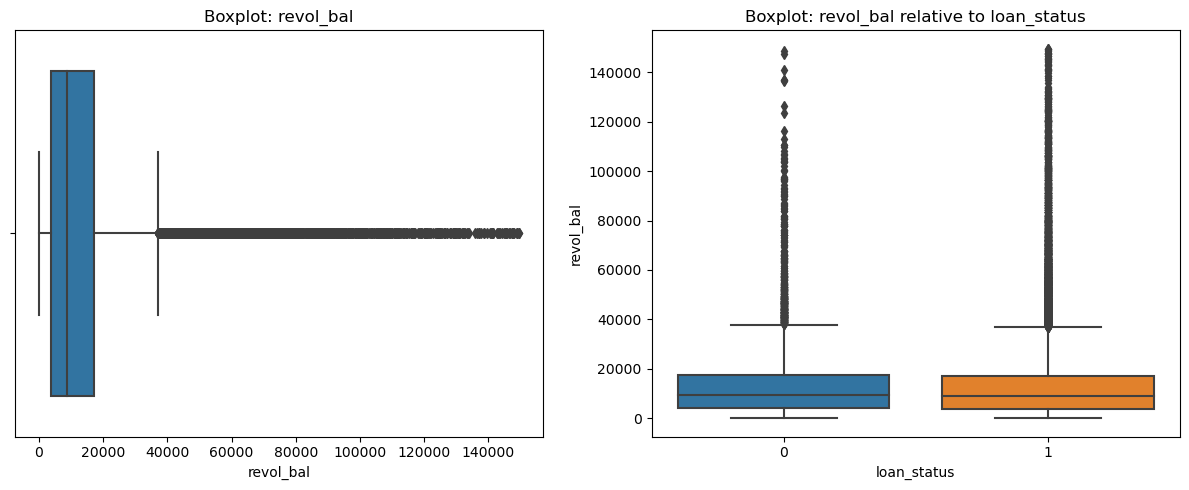

In [77]:
numeric_features(df, "revol_bal")

In [78]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'revol_bal'))
print('L_outliers, U_outliers: ', l_u(df, 'revol_bal'))
print('Q1, Q3, IQR: ', quartiles(df, 'revol_bal'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'revol_bal'))

Range of values:  149588.0
L_outliers, U_outliers:  (-16336.875, 37106.125)
Q1, Q3, IQR:  (3704.25, 17065.0, 13360.75)
No.U_outliers, No.L_outliers, %U, %L:  (2500, 0, 6, 0)


## 14. 'revol_util' - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [79]:
df['revol_util'].describe()

count    39786.000000
mean        48.858679
std         28.318823
min          0.000000
25%         25.500000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [80]:
df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,55.611571,27.848931,0.0,34.5,58.3,79.075,99.9
1,34116.0,47.736364,28.240508,0.0,24.2,47.9,71.000,99.9


In [81]:
df['revol_util'].value_counts()

0.00     980
49.30     93
0.20      63
63.00     62
40.70     59
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

In this column, the results should be similar to 'revol_bal' and should also correlate with each other. The 'revol_util' index based on 'revol_bal'.

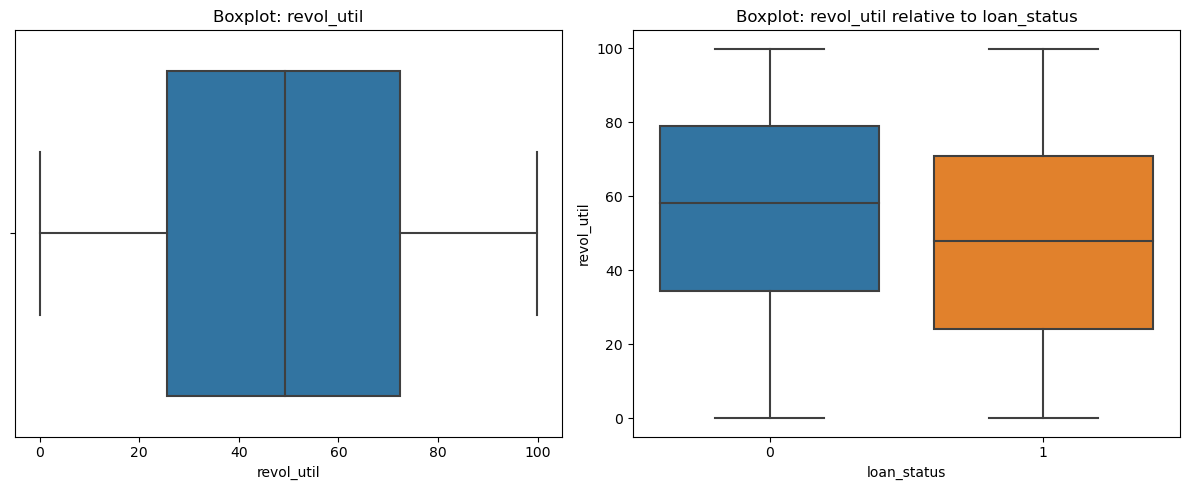

In [82]:
numeric_features(df, "revol_util")

In [83]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'revol_util'))
print('L_outliers, U_outliers: ', l_u(df, 'revol_util'))
print('Q1, Q3, IQR: ', quartiles(df, 'revol_util'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'revol_util'))

Range of values:  99.9
L_outliers, U_outliers:  (-44.85000000000001, 142.75)
Q1, Q3, IQR:  (25.5, 72.4, 46.900000000000006)
No.U_outliers, No.L_outliers, %U, %L:  (0, 0, 0, 0)


## 15. 'total_acc' - The total number of credit lines currently in the borrower's credit file.

In [84]:
df['total_acc'].describe()

count    39786.000000
mean        22.090308
std         11.401620
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

In [85]:
df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,21.457143,11.448791,2.0,13.0,20.0,28.0,74.0
1,34116.0,22.195539,11.390520,2.0,14.0,21.0,29.0,90.0


In [86]:
df['total_acc'].value_counts()

16.0    1475
15.0    1465
17.0    1461
14.0    1449
20.0    1430
        ... 
74.0       1
77.0       1
78.0       1
87.0       1
90.0       1
Name: total_acc, Length: 82, dtype: int64

Fully Paid and Charged Off borrowers have similar numbers of credit lines. 

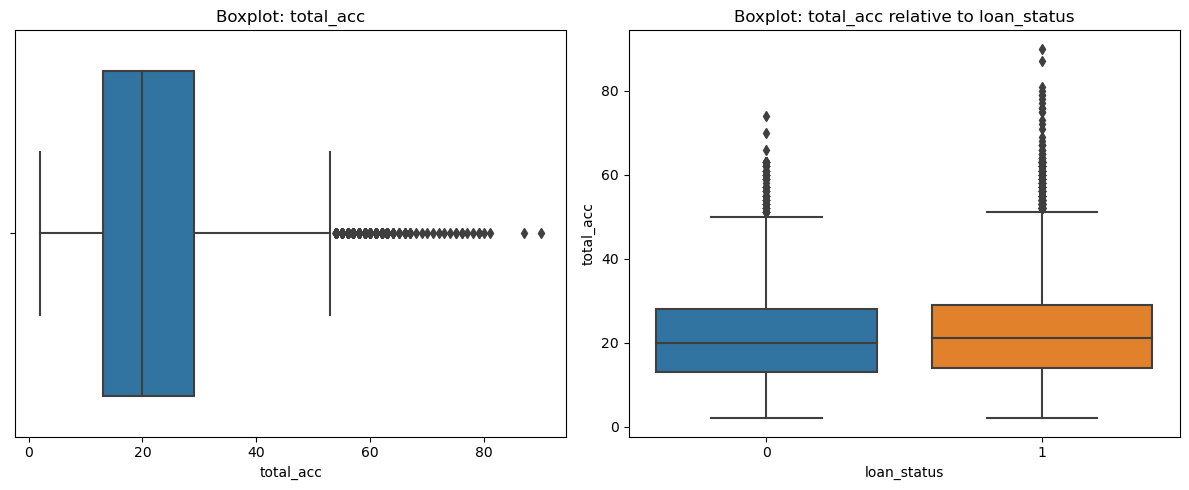

In [87]:
numeric_features(df, "total_acc")

In [88]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'total_acc'))
print('L_outliers, U_outliers: ', l_u(df, 'total_acc'))
print('Q1, Q3, IQR: ', quartiles(df, 'total_acc'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'total_acc'))

Range of values:  88.0
L_outliers, U_outliers:  (-11.0, 53.0)
Q1, Q3, IQR:  (13.0, 29.0, 16.0)
No.U_outliers, No.L_outliers, %U, %L:  (526, 0, 1, 0)


## 16. 'pub_rec_bankruptcies' - Number of public record bankruptcies.

In [89]:
df['pub_rec_bankruptcies'].describe()

count    39786.000000
mean         0.042528
std          0.202662
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [90]:
df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,0.065961,0.249653,0.0,0.0,0.0,0.0,2.0
1,34116.0,0.038633,0.193480,0.0,0.0,0.0,0.0,2.0


In [91]:
df['pub_rec_bankruptcies'].value_counts()

0.0    38101
1.0     1678
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [92]:
((df.pub_rec_bankruptcies == 0.0).sum() / df['pub_rec_bankruptcies'].count()) * 100

95.7648419041874

Almost 96% (95.7%) of the borrowers have not registered bankruptcy which seems perfectly understandable.

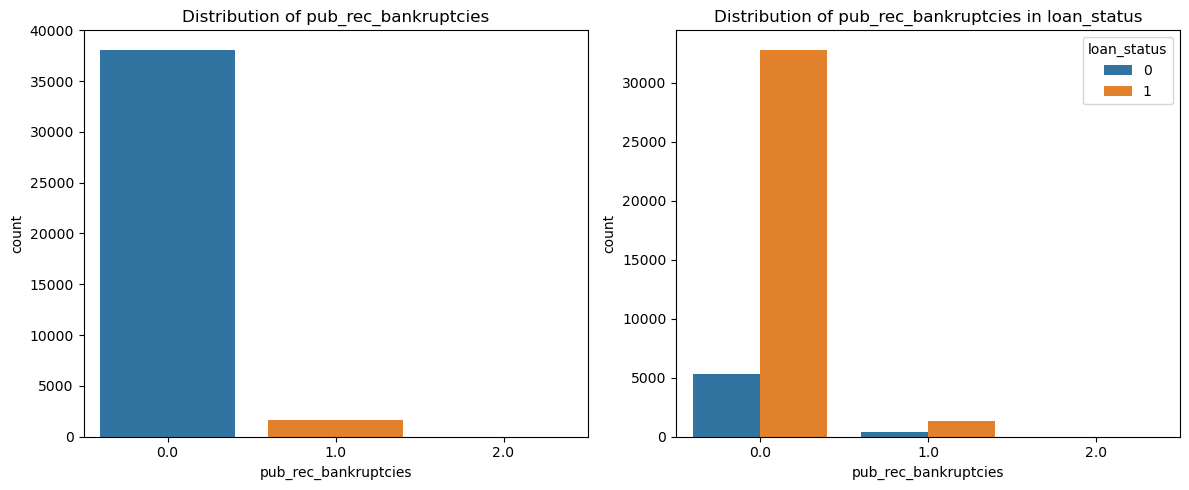

In [93]:
categorical_features(df, "pub_rec_bankruptcies")

In [94]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'pub_rec_bankruptcies'))
print('L_outliers, U_outliers: ', l_u(df, 'pub_rec_bankruptcies'))
print('Q1, Q3, IQR: ', quartiles(df, 'pub_rec_bankruptcies'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'pub_rec_bankruptcies'))

Range of values:  2.0
L_outliers, U_outliers:  (0.0, 0.0)
Q1, Q3, IQR:  (0.0, 0.0, 0.0)
No.U_outliers, No.L_outliers, %U, %L:  (1685, 0, 4, 0)


## 17. 'fico_range_low' - The lower boundary range the borrower's FICO at loan origination belongs to.

In [95]:
df['fico_range_low'].describe()

count    39786.000000
mean       714.997989
std         35.840682
min        625.000000
25%        685.000000
50%        710.000000
75%        740.000000
max        825.000000
Name: fico_range_low, dtype: float64

In [96]:
df.groupby('loan_status')['fico_range_low'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,703.634039,31.871688,660.0,680.0,700.0,725.0,820.0
1,34116.0,716.886651,36.113997,625.0,685.0,715.0,740.0,825.0


In [97]:
df['fico_range_low'].value_counts()

700.0    2129
685.0    2116
695.0    2063
690.0    2043
680.0    2040
720.0    1860
705.0    1854
675.0    1819
725.0    1804
715.0    1783
670.0    1672
710.0    1668
665.0    1617
730.0    1594
735.0    1576
740.0    1479
660.0    1420
745.0    1312
750.0    1287
755.0    1091
760.0     976
770.0     796
765.0     787
775.0     652
780.0     571
790.0     419
785.0     405
795.0     337
800.0     249
805.0     190
810.0     125
815.0      28
820.0      19
825.0       3
630.0       1
625.0       1
Name: fico_range_low, dtype: int64

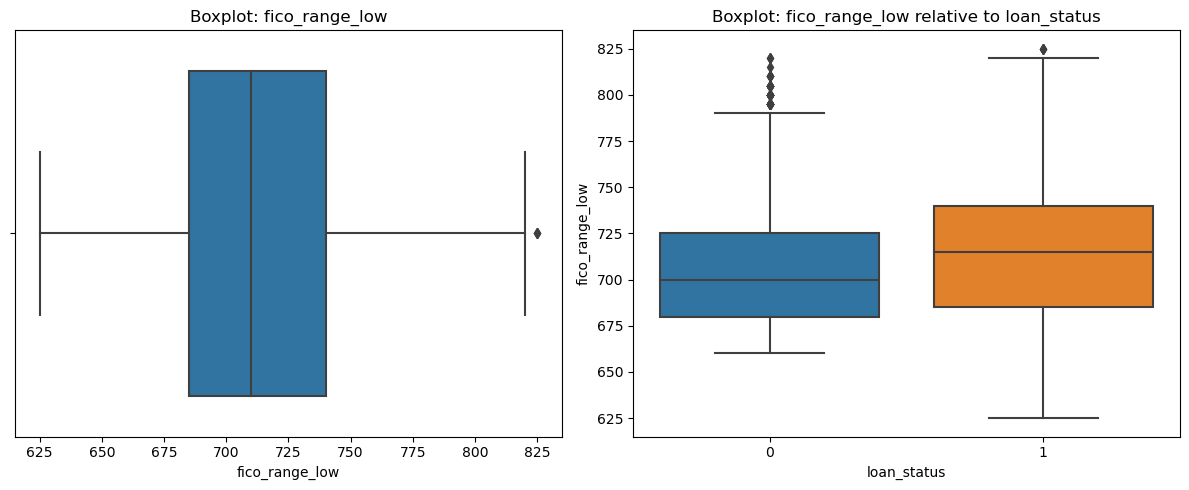

In [98]:
numeric_features(df, "fico_range_low")

In [99]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'fico_range_low'))
print('L_outliers, U_outliers: ', l_u(df, 'fico_range_low'))
print('Q1, Q3, IQR: ', quartiles(df, 'fico_range_low'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'fico_range_low'))

Range of values:  200.0
L_outliers, U_outliers:  (602.5, 822.5)
Q1, Q3, IQR:  (685.0, 740.0, 55.0)
No.U_outliers, No.L_outliers, %U, %L:  (3, 0, 0, 0)


The 'fico_range_low' column is normally distributed, which means that most borrowers fall into the middle category. A loan was not granted to anyone who did not meet the fico conditions.

## 18. 'fico_range_high' - The upper boundary range the borrowerâ€™s FICO at loan origination belongs to.

In [100]:
df['fico_range_high'].describe()

count    39786.000000
mean       718.997989
std         35.840682
min        629.000000
25%        689.000000
50%        714.000000
75%        744.000000
max        829.000000
Name: fico_range_high, dtype: float64

In [101]:
df.groupby('loan_status')['fico_range_high'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,5670.0,707.634039,31.871688,664.0,684.0,704.0,729.0,824.0
1,34116.0,720.886651,36.113997,629.0,689.0,719.0,744.0,829.0


In [102]:
df['fico_range_high'].value_counts()

704.0    2129
689.0    2116
699.0    2063
694.0    2043
684.0    2040
724.0    1860
709.0    1854
679.0    1819
729.0    1804
719.0    1783
674.0    1672
714.0    1668
669.0    1617
734.0    1594
739.0    1576
744.0    1479
664.0    1420
749.0    1312
754.0    1287
759.0    1091
764.0     976
774.0     796
769.0     787
779.0     652
784.0     571
794.0     419
789.0     405
799.0     337
804.0     249
809.0     190
814.0     125
819.0      28
824.0      19
829.0       3
634.0       1
629.0       1
Name: fico_range_high, dtype: int64

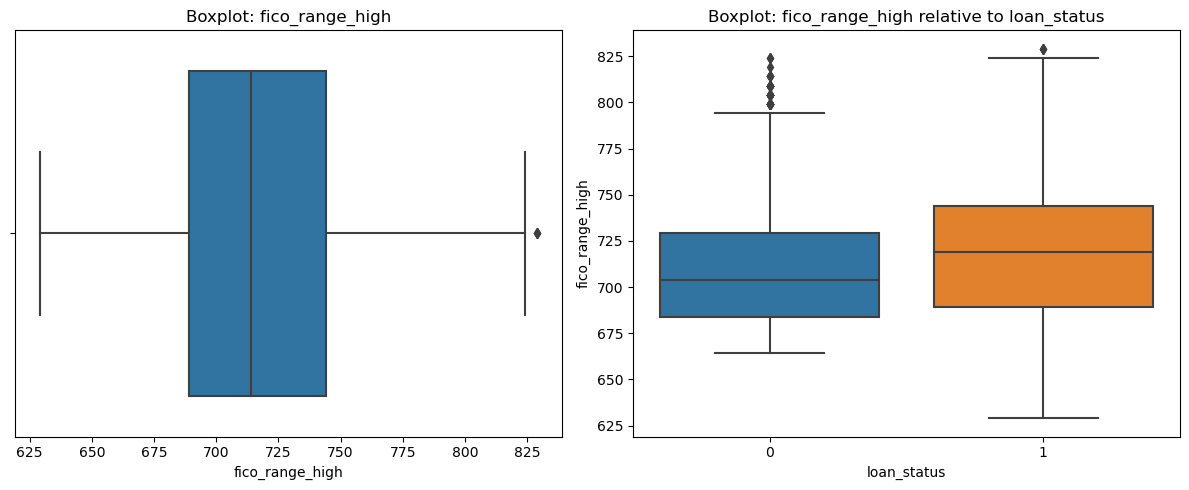

In [103]:
numeric_features(df, "fico_range_high")

In [104]:
# Range of values
# Lower and Upper outliers
# Quartiles
# No. and % of outliers

print('Range of values: ', range_v(df, 'fico_range_high'))
print('L_outliers, U_outliers: ', l_u(df, 'fico_range_high'))
print('Q1, Q3, IQR: ', quartiles(df, 'fico_range_high'))
print('No.U_outliers, No.L_outliers, %U, %L: ', outliers(df, 'fico_range_high'))

Range of values:  200.0
L_outliers, U_outliers:  (606.5, 826.5)
Q1, Q3, IQR:  (689.0, 744.0, 55.0)
No.U_outliers, No.L_outliers, %U, %L:  (3, 0, 0, 0)


Conclusions are similar to those in the above column.

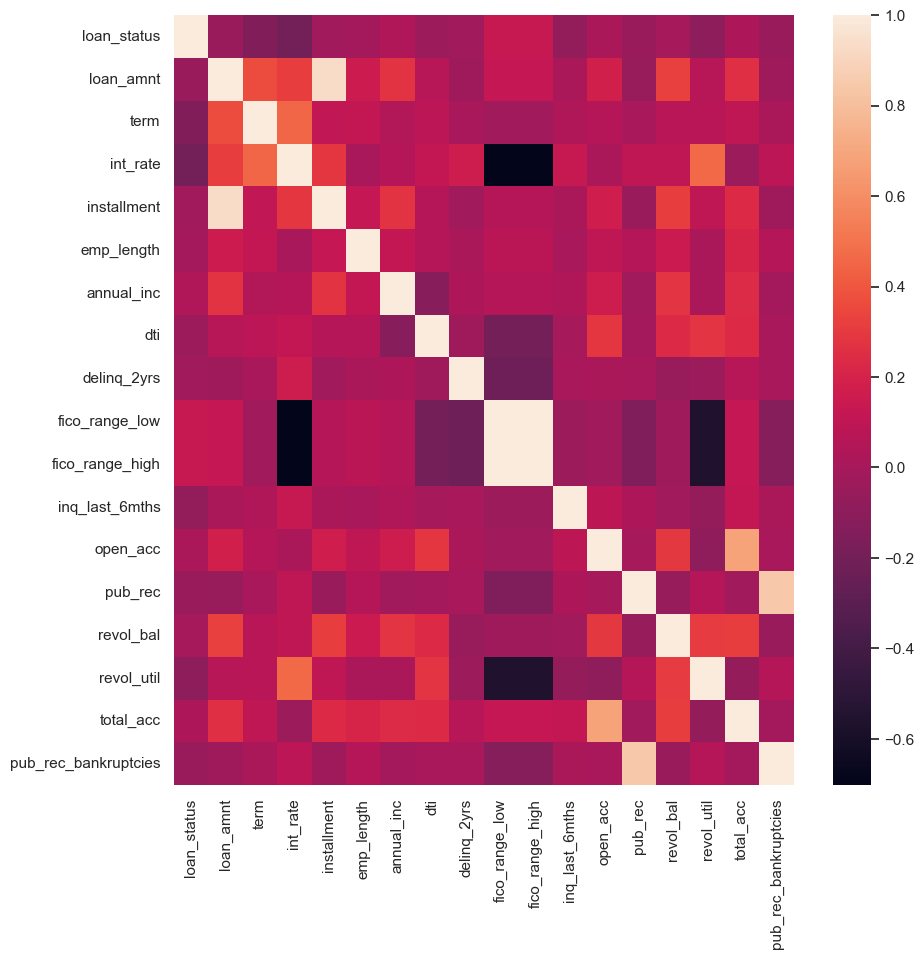

In [105]:
# Checking correlation and using heatmap to visualise it.

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

# Heatmap

sns.heatmap(df.corr())
plt.show()

There are several columns that correlate well with each other. It will be taken into account in the next step - Feature Engineering.

### Converting the 'issue_d' and 'earliest_cr_line' columns to datatime type.

## 19. 'issue_d' - The month which the loan was funded

In [106]:
df['issue_d'].describe(datetime_is_numeric=True)

count          39786
unique            55
top       2011-12-01
freq            2267
Name: issue_d, dtype: object

In [107]:
df.groupby('loan_status')['issue_d'].describe(datetime_is_numeric=True)

,count,unique,top,freq
loan_status,,,,
0,5670,53,2011-12-01,431
1,34116,55,2011-11-01,1888


In [108]:
df['issue_d'].value_counts()

2011-12-01    2267
2011-11-01    2232
2011-10-01    2118
2011-09-01    2067
2011-08-01    1934
2011-07-01    1875
2011-06-01    1835
2011-05-01    1704
2011-04-01    1563
2011-03-01    1448
2011-01-01    1380
2011-02-01    1298
2010-12-01    1269
2010-10-01    1133
2010-11-01    1121
2010-07-01    1119
2010-09-01    1087
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007-07-01  

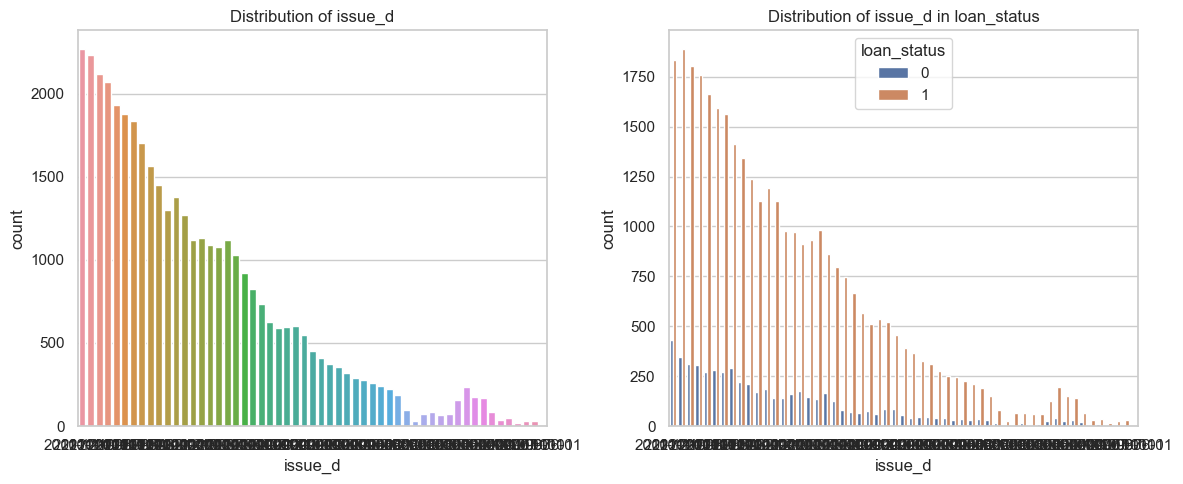

In [109]:
categorical_features(df, "issue_d")

<AxesSubplot:xlabel='issue_d', ylabel='loan_amnt'>

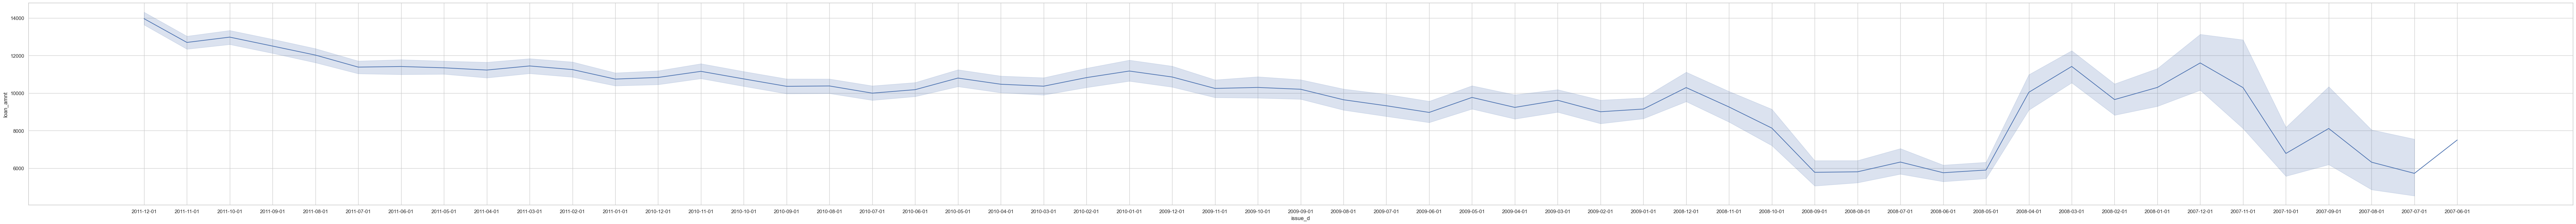

In [110]:
plt.figure(figsize=(100,8))
sns.lineplot(data=df, x="issue_d", y="loan_amnt")
# Double click on the chart to zoom in

There is a visible decrease in the number of loans granted from May to September 2008. One of the possibilities of such a situation may be the global economic crisis that coincided with that time (2007-2009, the peak of the crisis in 2008).

## 20. 'earliest_cr_line' - The month the borrower's earliest reported credit line was opened.

In [111]:
df['earliest_cr_line'].describe(datetime_is_numeric=True)

count          39786
unique           526
top       1998-11-01
freq             371
Name: earliest_cr_line, dtype: object

In [112]:
df.groupby('loan_status')['earliest_cr_line'].describe(datetime_is_numeric=True)

,count,unique,top,freq
loan_status,,,,
0,5670,421,1998-11-01,59
1,34116,522,1999-10-01,333


In [113]:
df['earliest_cr_line'].value_counts()

1998-11-01    371
1999-10-01    366
1998-12-01    349
2000-10-01    346
1997-12-01    329
             ... 
1966-02-01      1
1961-12-01      1
1954-10-01      1
1972-06-01      1
1974-10-01      1
Name: earliest_cr_line, Length: 526, dtype: int64

<AxesSubplot:xlabel='earliest_cr_line', ylabel='loan_amnt'>

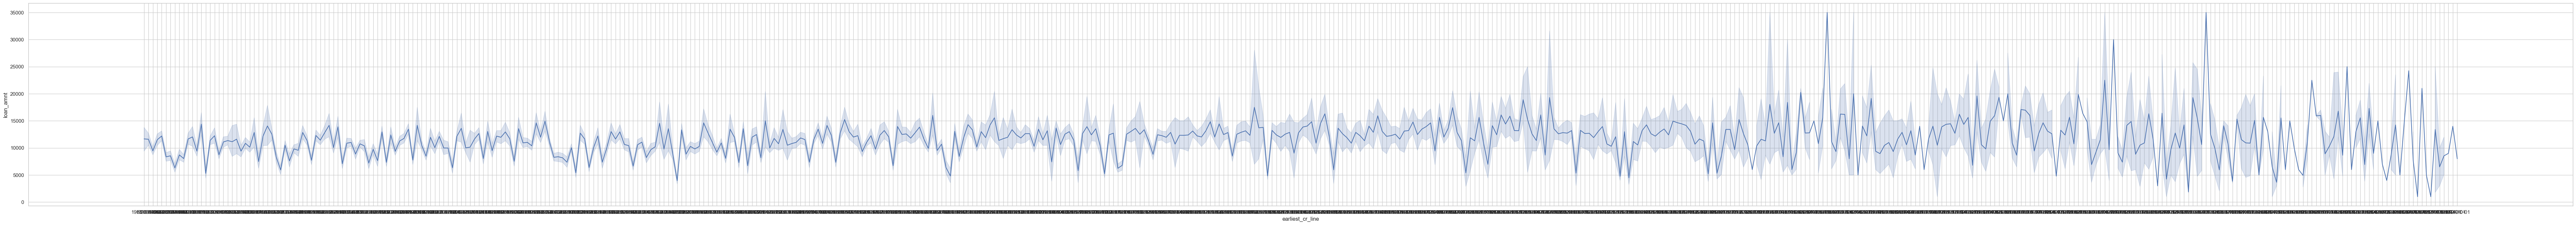

In [114]:
plt.figure(figsize=(100,8))
sns.lineplot(data=df, x="earliest_cr_line", y="loan_amnt")
# Double click on the chart to zoom in

The borrowers who borrow higher amounts have a longer credit history.

In [115]:
display(df.head())

,loan_status,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1,5000.0,36,10.65,162.87,B2,10.0,RENT,24000.0,Verified,2011-12-01,credit_card,AZ,27.65,0.0,1985-01-01,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0
1,0,2500.0,60,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,car,GA,1.00,0.0,1999-04-01,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0
2,1,2400.0,36,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,small_business,IL,8.72,0.0,2001-11-01,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0
3,1,10000.0,36,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,other,CA,20.00,0.0,1996-02-01,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0
4,1,3000.0,60,12.69,67.79,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,other,OR,17.94,0.0,1996-01-01,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,0.0


In [116]:
# Exporting the new DataFrame to .csv file.

df.to_csv('Part_2.csv', index = False)